In [14]:
 %matplotlib notebook

In [15]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import datetime

In [16]:
# Name csv file
file_name = "all_candidates.csv"

# Load candidate csv file into dataframe
raw_candidate_df = pd.read_csv(file_name, encoding="ISO-8859-1")
raw_candidate_df.drop_duplicates(keep='first', inplace=True)

raw_candidate_df.head()

,Unnamed: 0,Date,Favorite Count,Retweet Count,Tweet Text,Candidate,Cleaned Tweet Text,Sentiment Score,Sentiment Bucket
0,792,5/2/2019,1,1,b'@tedcruz Michael Bennet molly whopped you on...,bennet,Michael Bennet molly whopped you on the Senate...,0.0,Neutral
1,793,5/2/2019,0,0,b'Sen. Michael Bennet announces a 2020 preside...,bennet,Sen Michael Bennet announces a 2020 presidenti...,0.0,Neutral
2,794,5/2/2019,0,0,b'Senator Michael Bennet Announces Presidentia...,bennet,Senator Michael Bennet Announces Presidential ...,0.0,Neutral
3,795,5/2/2019,4,1,b'Colorado Sen. Michael Bennet announces 2020 ...,bennet,Colorado Sen Michael Bennet announces 2020 cam...,0.4,Positive
4,796,5/2/2019,0,0,b'Colorado Senator Michael Bennet announces 20...,bennet,Colorado Senator Michael Bennet announces 2020...,0.0,Neutral


In [17]:
#Rename Column Headers in Dataframe
raw_candidate_df = raw_candidate_df.rename(columns={"Retweet Count":"retweet_count","Cleaned Tweet Text":"cleaned_tweet_text"})
raw_candidate_df.head()                                                       

,Unnamed: 0,Date,Favorite Count,retweet_count,Tweet Text,Candidate,cleaned_tweet_text,Sentiment Score,Sentiment Bucket
0,792,5/2/2019,1,1,b'@tedcruz Michael Bennet molly whopped you on...,bennet,Michael Bennet molly whopped you on the Senate...,0.0,Neutral
1,793,5/2/2019,0,0,b'Sen. Michael Bennet announces a 2020 preside...,bennet,Sen Michael Bennet announces a 2020 presidenti...,0.0,Neutral
2,794,5/2/2019,0,0,b'Senator Michael Bennet Announces Presidentia...,bennet,Senator Michael Bennet Announces Presidential ...,0.0,Neutral
3,795,5/2/2019,4,1,b'Colorado Sen. Michael Bennet announces 2020 ...,bennet,Colorado Sen Michael Bennet announces 2020 cam...,0.4,Positive
4,796,5/2/2019,0,0,b'Colorado Senator Michael Bennet announces 20...,bennet,Colorado Senator Michael Bennet announces 2020...,0.0,Neutral


In [18]:
raw_candidate_df.dtypes

Unnamed: 0              int64
Date                   object
Favorite Count          int64
retweet_count           int64
Tweet Text             object
Candidate              object
cleaned_tweet_text     object
Sentiment Score       float64
Sentiment Bucket       object
dtype: object

In [19]:
retweets_df = raw_candidate_df.nlargest(25, columns=['retweet_count'])
retweets_df

,Unnamed: 0,Date,Favorite Count,retweet_count,Tweet Text,Candidate,cleaned_tweet_text,Sentiment Score,Sentiment Bucket
32077,37355,5/2/2019,6152,4981,b'Here is a picture of Trump 2020 campaign sta...,trump,Here is a picture of Trump 2020 campaign staff...,0.000000,Neutral
33051,38329,5/2/2019,6613,4882,b'Alabama State Rep. John Rogers (D) responds ...,trump,Alabama State Rep John Rogers D responds to Do...,0.000000,Neutral
21174,9238,5/2/2019,17100,3841,b'Kamala Harris on CNN responds to Trump calli...,harris,Kamala Harris on CNN responds to Trump calling...,0.400000,Positive
10043,8293,5/2/2019,5370,3396,b'Joe Biden\xe2\x80\x99s son Hunter alongside ...,biden,Joe son Hunter alongside Chris Heinz John st...,0.000000,Neutral
39152,44430,5/2/2019,13942,3172,b'Lives are at stake. I\xe2\x80\x99m on my way...,trump,Lives are at stake on my way to vote to overr...,0.000000,Neutral
8154,6404,5/2/2019,7685,2551,"b'Joe Biden: ""I actually like Dick Cheney... I...",biden,Joe Biden I actually like Dick Cheney I get on...,0.083333,Positive
11487,9737,5/2/2019,5258,2501,b'The President\xe2\x80\x99s lawyer asked the ...,biden,The lawyer asked the Ukrainian government for...,0.000000,Neutral
16478,4379,5/2/2019,8233,2425,"b""TIME's new cover: Mayor Pete Buttigieg's unl...",buttigieg,TIMEs new cover Mayor Pete Buttigiegs unlikely...,0.078788,Positive
30010,1213,5/2/2019,8343,2085,"b'Inbox: Today, Rep. Eric Swalwell called for ...",swalwell,Inbox Today Rep Eric Swalwell called for an im...,0.000000,Neutral
31085,36363,5/2/2019,7843,1902,b'Twitter could literally cut off the main art...,trump,Twitter could literally cut off the main arter...,-0.234921,Negative


<IPython.core.display.Javascript object>


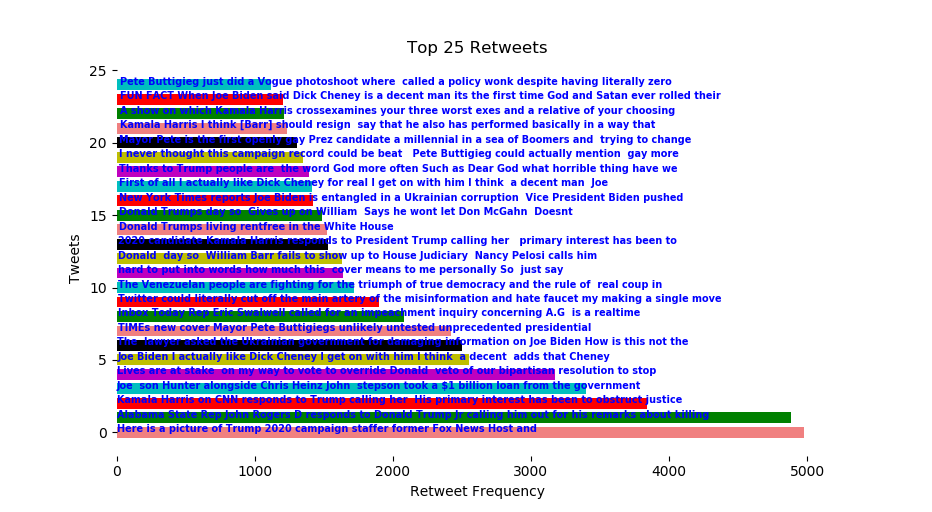

In [20]:
x = retweets_df["cleaned_tweet_text"].values
y = retweets_df["retweet_count"].values

colors = ['lightcoral', 'g', 'r', 'c', 'm', 'y', 'k']
fig, ax = plt.subplots()
plt.box(False)

offset = 0.75
for k in range(len(x)):
    ax.text(offset, k, x[k], color='blue', fontweight='bold', fontsize = 7)
    offset = offset+1

width = 0.75  # the width of the bars
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color = colors)
plt.title('Top 25 Retweets')
plt.xlabel('Retweet Frequency', fontsize = 10)
plt.ylabel('Tweets', fontsize = 10)


plt.savefig('popular_retweets.jpg')
plt.show()